In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from helper import linear_regression as lr  # my own module
from helper import general as general

sns.set(context="notebook", style="whitegrid", palette="dark")

%matplotlib inline
%reload_ext autoreload
%autoreload 2

df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])

# Visualize Data

In [2]:
print (df.head())
print (df.info())

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB
None


/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


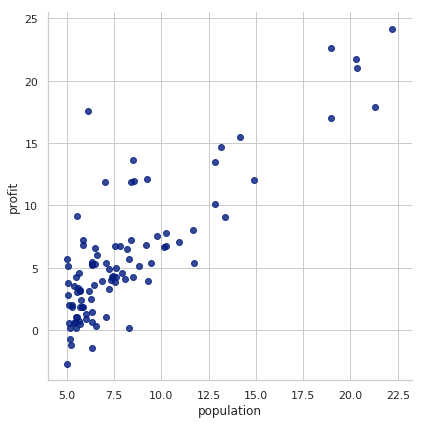

In [3]:
sns.lmplot('population', 'profit', df, size=6, fit_reg=False)

# Batch Gradient Decent

# compute cost

<img style="float: left;" src="img/linear_cost.png">

In [4]:
data = df
X = general.get_X(data)
print(X.shape, type(X))

y = general.get_y(data)
print(y.shape, type(y))

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


/media/singhals/hdd/My Implementation/Coursera-ML-AndrewNg-master/helper/general.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return data.iloc[:, :-1].as_matrix()  # this return ndarray, not matrix


In [5]:
theta = np.zeros(X.shape[1])

In [6]:
lr.cost(theta, X, y)



32.07273387745567

# batch gradient decent
<img style="float: left;" src="img/linear_gradient.png">

In [7]:
epoch = 500
final_theta, cost_data = lr.batch_gradient_decent(theta, X, y, epoch)

In [8]:
# compute final cost
lr.cost(final_theta, X, y)

4.713809531116866

# visualize cost data

/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'cost')

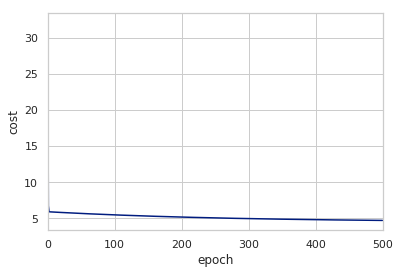

In [9]:
ax = sns.tsplot(cost_data, time=np.arange(epoch+1))
ax.set_xlabel('epoch')
ax.set_ylabel('cost')

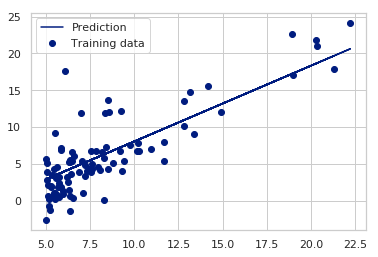

In [10]:
b = final_theta[0] # intercept
m = final_theta[1] # slope

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, label="Prediction")
plt.legend(loc=2)

# Optional Section

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="dark")

import sys
sys.path.append('..')

from helper import linear_regression as lr  # my own module
from helper import general as general

In [12]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Normalize Data

In [13]:
data = general.normalize_feature(raw_data)
data.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## Multi-var Batch Gradient Decent

In [14]:
X = general.get_X(data)
print(X.shape, type(X))

y = general.get_y(data)
print(y.shape, type(y))

(47, 3) <class 'numpy.ndarray'>
(47,) <class 'numpy.ndarray'>


In [15]:
alpha = 0.01
theta = np.zeros(X.shape[1])
epoch = 500

In [16]:
final_theta, cost_data = lr.batch_gradient_decent(theta, X, y, epoch, alpha=alpha)

/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


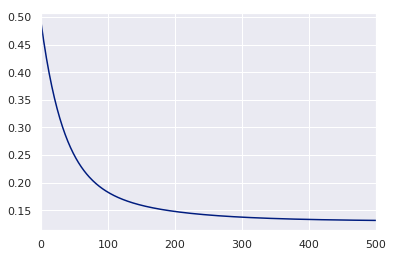

In [17]:
sns.tsplot(time=np.arange(len(cost_data)), data = cost_data)

In [18]:
final_theta

array([-1.15888386e-16,  8.30383883e-01,  8.23982853e-04])

## Learning Rate

In [19]:
base = np.logspace(-1, -5, num=4)
candidate = np.sort(np.concatenate((base, base*3)))
print(candidate)

[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


Text(0.5, 1.0, 'learning rate')

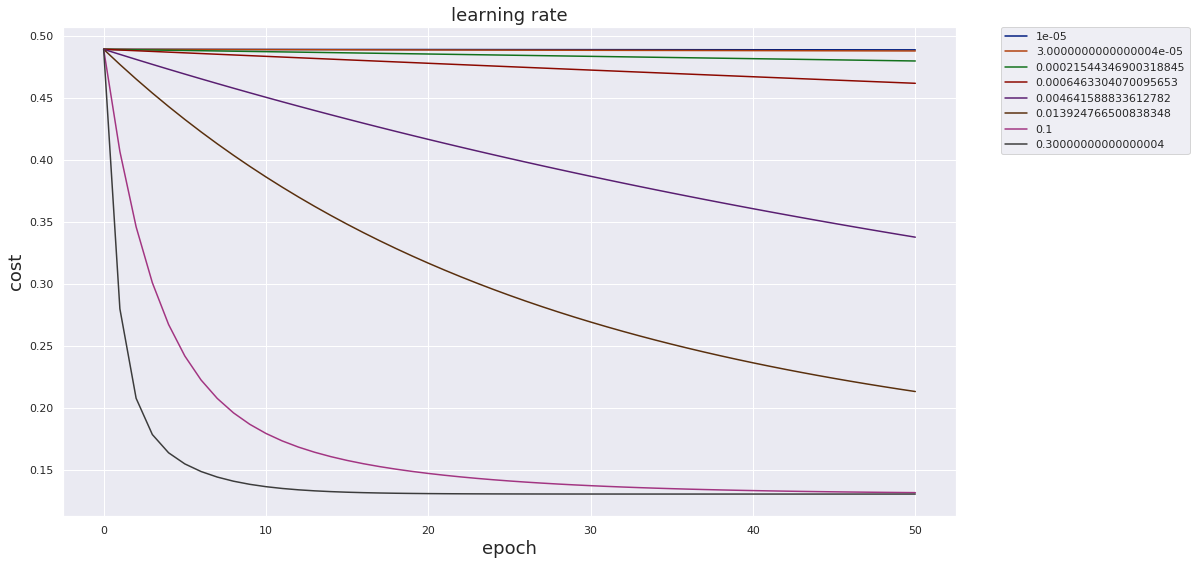

In [20]:
epoch=50

fig, ax = plt.subplots(figsize=(16, 9))

for alpha in candidate:
    _, cost_data = lr.batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
    ax.plot(np.arange(epoch+1), cost_data, label=alpha)

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)


# Tensoflow batch gradient decent

In [21]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('..')

from helper import linear_regression as lr  # my own module
from helper import general as general

import tensorflow as tf

In [22]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
data = general.normalize_feature(raw_data)

print(data.shape)
data.head()

(47, 3)


,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [23]:
X_data = general.get_X(data)
print(X_data.shape, type(X_data))

y_data = general.get_y(data).reshape(len(X_data), 1)  # special treatment for tensorflow input data
print(y_data.shape, type(y_data))

(47, 3) <class 'numpy.ndarray'>
(47, 1) <class 'numpy.ndarray'>


## run the tensorflow graph over several optimizer

In [24]:
epoch = 2000
alpha = 0.01

In [25]:
optimizer_dict={'GD': tf.train.GradientDescentOptimizer,
                'Adagrad': tf.train.AdagradOptimizer,
                'Adam': tf.train.AdamOptimizer,
                'Ftrl': tf.train.FtrlOptimizer,
                'RMS': tf.train.RMSPropOptimizer
               }
results = []
for name in optimizer_dict:
    res = lr.linear_regression(X_data, y_data, alpha, epoch, optimizer=optimizer_dict[name])
    res['name'] = name
    results.append(res)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Text(0.5, 1.0, 'different optimizer')

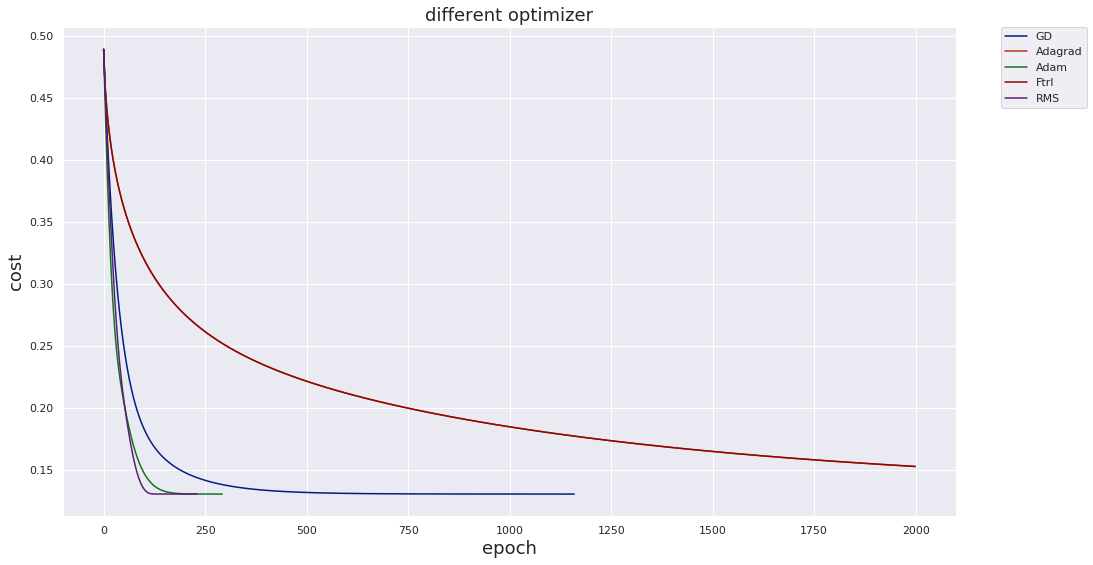

In [26]:
fig, ax = plt.subplots(figsize=(16, 9))

for res in results: 
    loss_data = res['loss']
    
#     print('for optimizer {}'.format(res['name']))
#     print('final parameters\n', res['parameters'])
#     print('final loss={}\n'.format(loss_data[-1]))
    ax.plot(np.arange(len(loss_data)), loss_data, label=res['name'])

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('different optimizer', fontsize=18)